In [5]:
from eyened_orm import ImageInstance, Modality, Laterality, DBManager
from sqlalchemy import select

# ensure that there is a .env file present in the root of eyened-platform and that it has the following variables:
# DB_HOST 
# DB_PORT
# DB_USER
# DB_PASSWORD
# DB_NAME

# IMAGES_BASEPATH
# STORAGE_BASEPATH

# call DBManager.init() to load from the default ".env" file in the root of eyened-platform
# passing "prod" will load from the "prod.env" file in the root of eyened-platform
DBManager.init("prod")

In [12]:
with DBManager.yield_session() as session:
    images = session.scalars(
        select(ImageInstance)
        .where(
            (ImageInstance.Modality == Modality.ColorFundus)
            & (ImageInstance.Laterality == Laterality.R)
        )
        .limit(5)
    ).all()

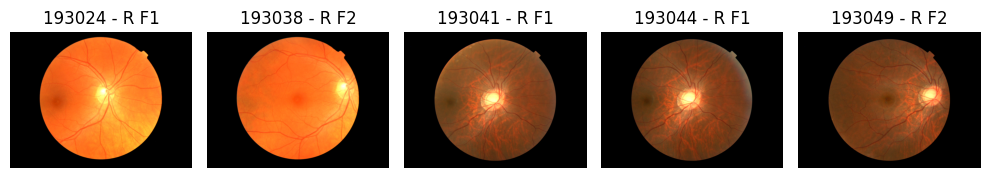

In [ ]:
from matplotlib import pyplot as plt
fig, axs = plt.subplots(1, len(images), figsize=(10, 10))
for ax, image in zip(axs, images):
    ax.imshow(image.pixel_array)
    ax.set_title(f"{image.ImageInstanceID} - {image.Laterality.name} F{image.AnatomicRegion}")
    ax.axis("off")
plt.tight_layout()
plt.show()